In [1]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

from tensorflow.python.keras.utils import np_utils
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import BatchNormalization

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from keras.layers import Conv1D
from keras.layers import Bidirectional, LSTM
import scipy

In [2]:
def get_examples(files:list):
    data = []
    for file_name in files:
        path = 'incart-data/' + file_name
        rec = wfdb.rdrecord(path)
        ecg = rec.p_signal[:, 0]
        ecg = scipy.fft.fft(ecg)
        data.append(ecg)
        
    examples = []
    for signal in data:
        for i in range(120):
            x = signal[i * 1285:(i + 1) * 1285]
            examples.append(x)
            
    return examples

In [3]:
pvc = get_examples(['I21','I23','I24','I19','I27','I28','I29','I33']) #PVCs

In [4]:
vc = get_examples(['I53','I48','I45','I43','I42','I36','I35','I26']) #ventricular couplets

In [5]:
bc = get_examples(['I75','I73','I61','I52','I37','I28','I17','I04']) #Bradycardia

In [6]:
pvt = get_examples(['I75','I67','I66','I65','I55','I54','I44','I43']) #Proxysmal VT

In [7]:
vb = get_examples(['I52','I47','I43','I40','I42','I32','I27','I08']) #Ventricular Bigeminy

In [8]:
X = np.array([*pvc, *vc, *bc, *pvt, *vb])

In [9]:
X.shape

(4800, 1285)

In [10]:
labels = []
for i in range(5):
    for j in range(960):
        labels.append(i)
Y = np.array(labels)
Y.shape

(4800,)

In [11]:
from sklearn.utils import shuffle

In [12]:
X,Y = shuffle(X,Y)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [14]:
prediction_model = Sequential()
# Add the first layer
prediction_model.add(Dense(64, activation='sigmoid',input_shape=(1285,), kernel_initializer='normal'))
prediction_model.add(Dense(64, activation='sigmoid', kernel_initializer='normal'))
prediction_model.add(Dense(64, activation='sigmoid', kernel_initializer='normal'))
prediction_model.add(Dense(64, activation='sigmoid', kernel_initializer='normal'))
prediction_model.add(Dense(5, activation='softmax', kernel_initializer='normal'))

In [15]:
# Compile your model with sgd
prediction_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the batch normalized model you recently built, store its history callback
output = prediction_model.fit(x_train, y_train,64, validation_data=(x_test,y_test), epochs=100, verbose=1)

Epoch 1/100
53/53 [==============================] - 2s 17ms/step - loss: 1.6125 - accuracy: 0.2018 - val_loss: 1.6184 - val_accuracy: 0.1854
Epoch 2/100
53/53 [==============================] - 0s 7ms/step - loss: 1.6095 - accuracy: 0.2089 - val_loss: 1.6178 - val_accuracy: 0.1965
Epoch 3/100
53/53 [==============================] - 0s 8ms/step - loss: 1.6089 - accuracy: 0.2161 - val_loss: 1.6069 - val_accuracy: 0.1965
Epoch 4/100
53/53 [==============================] - 0s 8ms/step - loss: 1.5876 - accuracy: 0.2699 - val_loss: 1.5760 - val_accuracy: 0.2549
Epoch 5/100
53/53 [==============================] - 0s 9ms/step - loss: 1.5019 - accuracy: 0.3238 - val_loss: 1.5620 - val_accuracy: 0.2771
Epoch 6/100
53/53 [==============================] - 0s 7ms/step - loss: 1.4456 - accuracy: 0.3429 - val_loss: 1.5904 - val_accuracy: 0.2465
Epoch 7/100
53/53 [==============================] - 0s 8ms/step - loss: 1.4145 - accuracy: 0.3458 - val_loss: 1.6062 - val_accuracy: 0.2500
Epoch 8/100


Epoch 59/100
53/53 [==============================] - 0s 6ms/step - loss: 0.9202 - accuracy: 0.6890 - val_loss: 2.1786 - val_accuracy: 0.2444
Epoch 60/100
53/53 [==============================] - 0s 6ms/step - loss: 0.9055 - accuracy: 0.6926 - val_loss: 2.1933 - val_accuracy: 0.2438
Epoch 61/100
53/53 [==============================] - 0s 6ms/step - loss: 0.8937 - accuracy: 0.6973 - val_loss: 2.2485 - val_accuracy: 0.2340
Epoch 62/100
53/53 [==============================] - 0s 6ms/step - loss: 0.8895 - accuracy: 0.7027 - val_loss: 2.2774 - val_accuracy: 0.2319
Epoch 63/100
53/53 [==============================] - 0s 7ms/step - loss: 0.8925 - accuracy: 0.6994 - val_loss: 2.2754 - val_accuracy: 0.2319
Epoch 64/100
53/53 [==============================] - 0s 6ms/step - loss: 0.8877 - accuracy: 0.7057 - val_loss: 2.2796 - val_accuracy: 0.2361
Epoch 65/100
53/53 [==============================] - 0s 7ms/step - loss: 0.8862 - accuracy: 0.7063 - val_loss: 2.2869 - val_accuracy: 0.2299
Epoch 

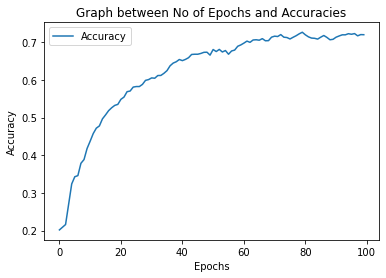

In [16]:
plt.plot(output.history['accuracy'],label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Graph between No of Epochs and Accuracies')
plt.legend()
plt.show()

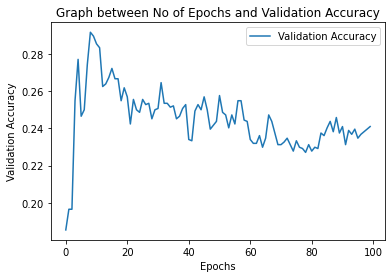

In [17]:
plt.plot(output.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Graph between No of Epochs and Validation Accuracy')
plt.legend()
plt.show()

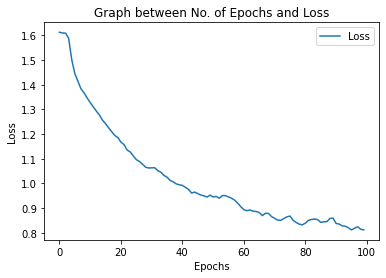

In [18]:
plt.plot(output.history['loss'],label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Graph between No. of Epochs and Loss')
plt.legend()
plt.show()